In [2]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("GOOG.csv")
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')
dataset = dataset.dropna()
dataset = dataset.sort_values(by='Date')
dataset = dataset.reset_index(drop=True)
#Calculating Moving Average for 7 days
dataset['MA7'] = dataset['Close'].rolling(window=7).mean()
delta = dataset['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
dataset['RSI'] = 100 - (100 / (1 + rs))
dataset = dataset.dropna()
dataset.to_csv("preprocessed_stock_data.csv", index=False)
print(dataset.head())


         Date       Low      Open     Volume      High     Close  \
13 2004-09-08  2.503118  2.509095  100186120  2.566132  2.547950   
14 2004-09-09  2.515571  2.553678   81620792  2.558161  2.548199   
15 2004-09-10  2.523043  2.530515  174804764  2.654052  2.623417   
16 2004-09-13  2.651561  2.655795  157628624  2.700129  2.677464   
17 2004-09-14  2.659780  2.676219  217608605  2.789544  2.776842   

    Adjusted Close       MA7        RSI  
13        2.547950  2.526352  53.260140  
14        2.548199  2.527419  53.275673  
15        2.623417  2.537951  44.068446  
16        2.677464  2.563748  46.374016  
17        2.776842  2.599257  62.899463  


C:\Users\User\AppData\Local\Temp\ipykernel_23784\1374082139.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

dataset = pd.read_csv("preprocessed_stock_data.csv")

dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')
dataset = dataset.dropna(subset=['Date'])
dataset = dataset.sort_values(by='Date').reset_index(drop=True)
dataset = dataset.fillna(method='ffill')

scaler = MinMaxScaler()
dataset[['Close', 'MA7', 'RSI']] = scaler.fit_transform(dataset[['Close', 'MA7', 'RSI']])


train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))

train = dataset[:train_size]
validation = dataset[train_size:train_size + val_size]
test = dataset[train_size + val_size:]

#Function to create sequence
def create_sequences(data, target, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i])
        y.append(target[i])
    return np.array(X), np.array(y)

#Generate sequences with a specified length
sequence_length = 15
X_train, y_train = create_sequences(train[['MA7', 'RSI']].values, train['Close'].values, sequence_length)
X_val, y_val = create_sequences(validation[['MA7', 'RSI']].values, validation['Close'].values, sequence_length)
X_test, y_test = create_sequences(test[['MA7', 'RSI']].values, test['Close'].values, sequence_length)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (3204, 15, 2), y_train shape: (3204,)
X_val shape: (674, 15, 2), y_val shape: (674,)
X_test shape: (676, 15, 2), y_test shape: (676,)


Running: Architecture=VanillaRNN, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Running: Architecture=VanillaRNN, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Running: Architecture=VanillaRNN, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Running: Architecture=VanillaRNN, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Running: Architecture=VanillaRNN, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Running: Architecture=VanillaRNN, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Running: Architecture=VanillaRNN, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Running: Architecture=VanillaRNN, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Running: Architecture=VanillaRNN, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Running: Architecture=VanillaRNN, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Running: Architecture=VanillaRNN, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Running: Architecture=VanillaRNN, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Running: Architecture=VanillaRNN, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Running: Architecture=VanillaRNN, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Running: Architecture=VanillaRNN, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Running: Architecture=VanillaRNN, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Running: Architecture=LSTM, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Running: Architecture=LSTM, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Running: Architecture=LSTM, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Running: Architecture=LSTM, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
Running: Architecture=LSTM, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Running: Architecture=LSTM, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Running: Architecture=LSTM, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Running: Architecture=LSTM, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Running: Architecture=LSTM, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Running: Architecture=LSTM, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Running: Architecture=LSTM, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Running: Architecture=LSTM, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
Running: Architecture=LSTM, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Running: Architecture=LSTM, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Running: Architecture=LSTM, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Running: Architecture=LSTM, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Running: Architecture=GRU, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Running: Architecture=GRU, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Running: Architecture=GRU, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Running: Architecture=GRU, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Running: Architecture=GRU, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Running: Architecture=GRU, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Running: Architecture=GRU, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Running: Architecture=GRU, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Running: Architecture=GRU, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Running: Architecture=GRU, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Running: Architecture=GRU, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Running: Architecture=GRU, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Running: Architecture=GRU, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Running: Architecture=GRU, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Running: Architecture=GRU, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Running: Architecture=GRU, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Running: Architecture=BidirectionalLSTM, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Running: Architecture=BidirectionalLSTM, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Running: Architecture=BidirectionalLSTM, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
Running: Architecture=BidirectionalLSTM, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step
Running: Architecture=BidirectionalLSTM, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Running: Architecture=BidirectionalLSTM, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Running: Architecture=BidirectionalLSTM, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
Running: Architecture=BidirectionalLSTM, Params={'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step
Running: Architecture=BidirectionalLSTM, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Running: Architecture=BidirectionalLSTM, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Running: Architecture=BidirectionalLSTM, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Running: Architecture=BidirectionalLSTM, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 50, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step
Running: Architecture=BidirectionalLSTM, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Running: Architecture=BidirectionalLSTM, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 1, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Running: Architecture=BidirectionalLSTM, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 100}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Running: Architecture=BidirectionalLSTM, Params={'batch_size': 128, 'dropout_rate': 0.5, 'epochs': 100, 'layers': 2, 'learning_rate': 0.005, 'sequence_length': 30, 'units': 200}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step
Best Model:
Architecture            GRU
batch_size               64
dropout_rate            0.5
epochs                  100
layers                    2
learning_rate         0.005
sequence_length          30
units                   200
MAE                0.023792
RMSE                0.02947
Name: 39, dtype: object
Worst Model:
Architecture       BidirectionalLSTM
batch_size                       128
dropout_rate                     0.5
epochs                            50
layers                             2
learning_rate                  0.005
sequence_length                   30
units                            100
MAE                        24.496739
RMSE                       43.492496
Name: 58, dtype: object
Generating plots for the best-performing model...


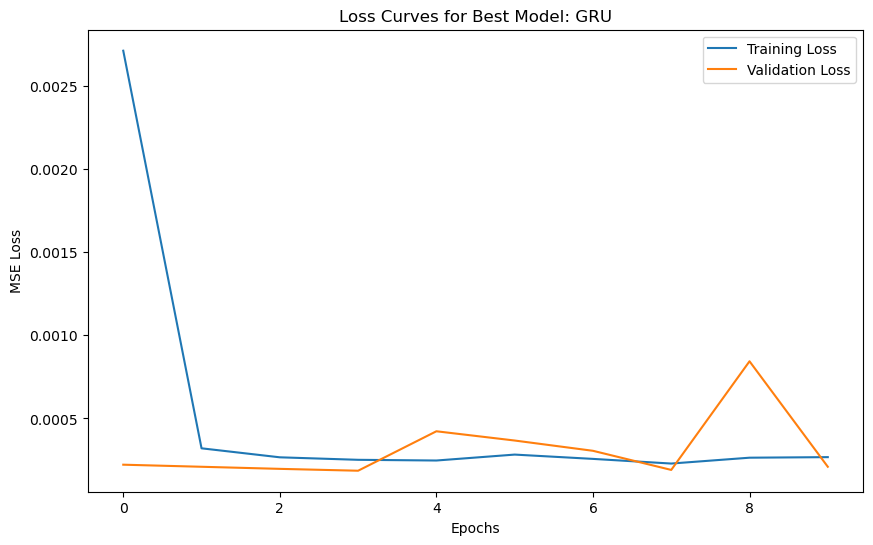

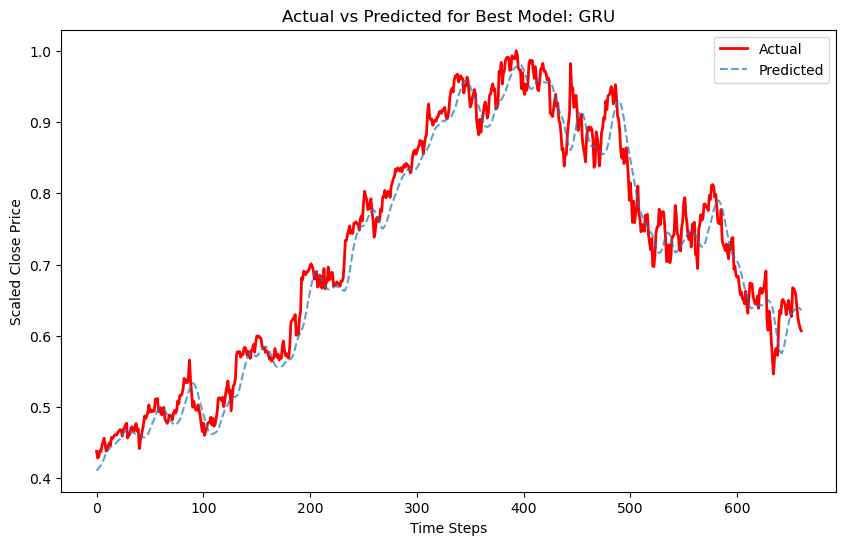

Generating combined plot for the best-performing model of each architecture...


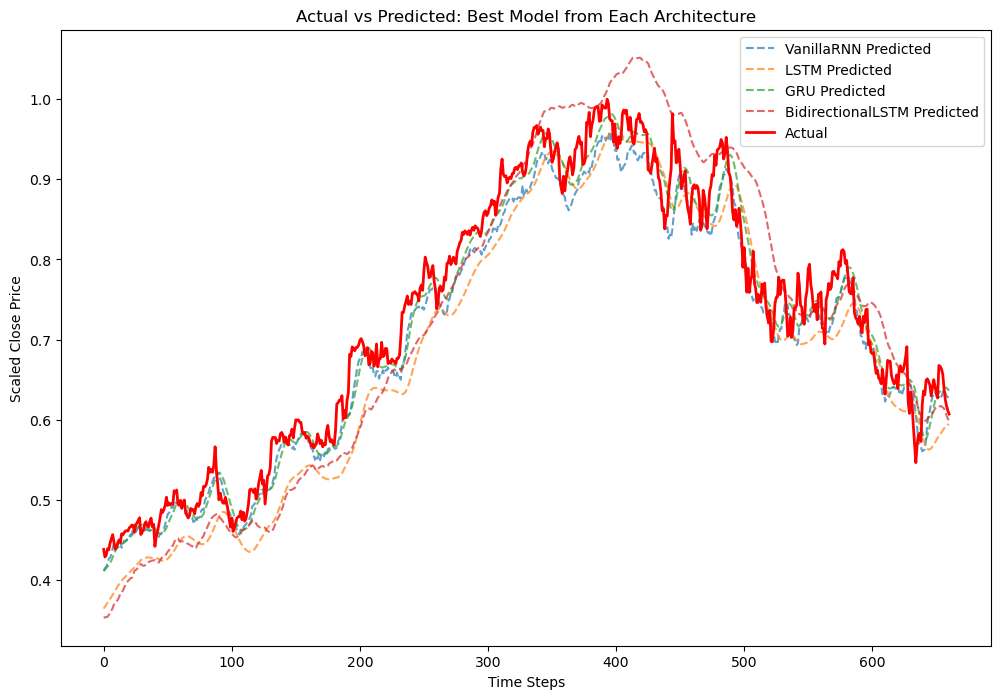

In [10]:
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import ParameterGrid
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import gc

np.random.seed(42)
tf.random.set_seed(42)

#Hyperparameter grid
param_grid = {
    "units": [100, 200],
    "dropout_rate": [0.5],
    "learning_rate": [0.005],
    "batch_size": [64, 128],
    "sequence_length": [30],
    "layers": [1, 2],
    "epochs": [50, 100]
}

#Model architectures
architectures = ["VanillaRNN", "LSTM", "GRU", "BidirectionalLSTM"]

#Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

# Initialize results storage
results = []
histories = {}

#Function to create models
def create_model(arch, params, input_shape, output_units):
    model = tf.keras.Sequential()
    for _ in range(params["layers"]):
        if arch == "VanillaRNN":
            model.add(tf.keras.layers.SimpleRNN(params["units"], activation="relu",
                                                return_sequences=_ < params["layers"] - 1,
                                                input_shape=input_shape))
        elif arch == "LSTM":
            model.add(tf.keras.layers.LSTM(params["units"], activation="relu",
                                           return_sequences=_ < params["layers"] - 1,
                                           input_shape=input_shape))
        elif arch == "GRU":
            model.add(tf.keras.layers.GRU(params["units"], activation="relu",
                                          return_sequences=_ < params["layers"] - 1,
                                          input_shape=input_shape))
        elif arch == "BidirectionalLSTM":
            model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(params["units"],
                                                                         activation="relu",
                                                                         return_sequences=_ < params["layers"] - 1,
                                                                         input_shape=input_shape)))
    model.add(tf.keras.layers.Dropout(params["dropout_rate"]))
    model.add(tf.keras.layers.Dense(output_units))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=params["learning_rate"]),
        loss="mse",
        metrics=["mae"]
    )
    return model

#Function for training and evaluation
def run_experiment(arch, params):
    sequence_length = params["sequence_length"]
    # Create sequences
    X_train_seq, y_train_seq = create_sequences(
        train[['MA7', 'RSI']].values, train['Close'].values, sequence_length, M
    )
    X_val_seq, y_val_seq = create_sequences(
        validation[['MA7', 'RSI']].values, validation['Close'].values, sequence_length, M
    )
    X_test_seq, y_test_seq = create_sequences(
        test[['MA7', 'RSI']].values, test['Close'].values, sequence_length, M
    )

    input_shape = (sequence_length, 2)
    output_units = M

    model = create_model(arch, params, input_shape, output_units)

    history = model.fit(
        X_train_seq, y_train_seq,
        validation_data=(X_val_seq, y_val_seq),
        epochs=params["epochs"],
        batch_size=params["batch_size"],
        verbose=0,
        callbacks=[early_stopping]
    )

    y_pred = model.predict(X_test_seq)
    mae = mean_absolute_error(y_test_seq.flatten(), y_pred.flatten())
    rmse = np.sqrt(mean_squared_error(y_test_seq.flatten(), y_pred.flatten()))

    results.append({
        "Architecture": arch,
        **params,
        "MAE": mae,
        "RMSE": rmse
    })

    histories[f"{arch}_batch_size={params['batch_size']}_dropout_rate={params['dropout_rate']}_epochs={params['epochs']}_layers={params['layers']}_learning_rate={params['learning_rate']}_sequence_length={params['sequence_length']}_units={params['units']}"] = {
        "history": history.history,
        "y_test": y_test_seq,
        "y_pred": y_pred
    }

    del model
    gc.collect()

for arch in architectures:
    for params in ParameterGrid(param_grid):
        print(f"Running: Architecture={arch}, Params={params}")
        run_experiment(arch, params)

results_df = pd.DataFrame(results)
results_df.to_csv("experiment_results.csv", index=False)

#Identify best and worst models
best_model = results_df.loc[results_df["MAE"].idxmin()]
worst_model = results_df.loc[results_df["MAE"].idxmax()]

print(f"Best Model:\n{best_model}")
print(f"Worst Model:\n{worst_model}")

def plot_loss_curves(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.show()

def plot_actual_vs_predicted(y_actual, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.plot(y_actual.flatten(), label='Actual', color='red', linewidth=2)
    plt.plot(y_pred.flatten(), label='Predicted', linestyle='dashed', alpha=0.7)
    plt.title(title)
    plt.xlabel('Time Steps')
    plt.ylabel('Scaled Close Price')
    plt.legend()
    plt.show()

#Plot best model
def plot_best_model(best_model, histories):
    best_key = f"{best_model['Architecture']}_batch_size={best_model['batch_size']}_dropout_rate={best_model['dropout_rate']}_epochs={best_model['epochs']}_layers={best_model['layers']}_learning_rate={best_model['learning_rate']}_sequence_length={best_model['sequence_length']}_units={best_model['units']}"

    if best_key in histories:
        best = histories[best_key]
        plot_loss_curves(best["history"], title=f"Loss Curves for Best Model: {best_model['Architecture']}")
        plot_actual_vs_predicted(best["y_test"], best["y_pred"], title=f"Actual vs Predicted for Best Model: {best_model['Architecture']}")
    else:
        print(f"KeyError: {best_key} not found in histories for best model.")

#Plot best models from each architecture
def plot_best_per_architecture_combined(results_df, histories):
    architectures = results_df["Architecture"].unique()
    plt.figure(figsize=(12, 8))
    for arch in architectures:
        best_model_arch = results_df[results_df["Architecture"] == arch].sort_values(by="MAE").iloc[0]
        best_key = f"{arch}_batch_size={best_model_arch['batch_size']}_dropout_rate={best_model_arch['dropout_rate']}_epochs={best_model_arch['epochs']}_layers={best_model_arch['layers']}_learning_rate={best_model_arch['learning_rate']}_sequence_length={best_model_arch['sequence_length']}_units={best_model_arch['units']}"
        if best_key not in histories:
            print(f"KeyError: {best_key} not found in histories for {arch}. Skipping...")
            continue
        value = histories[best_key]
        plt.plot(value["y_pred"].flatten(), label=f"{arch} Predicted", linestyle='dashed', alpha=0.7)
    y_actual = list(histories.values())[0]["y_test"]
    plt.plot(y_actual.flatten(), label='Actual', color='red', linewidth=2)
    plt.title("Actual vs Predicted: Best Model from Each Architecture")
    plt.xlabel('Time Steps')
    plt.ylabel('Scaled Close Price')
    plt.legend()
    plt.show()

print("best-performing model")
plot_best_model(best_model, histories)

print("Combined plot for the best-performing model of each architecture")
plot_best_per_architecture_combined(results_df, histories)
```

Best-performing LSTM model:


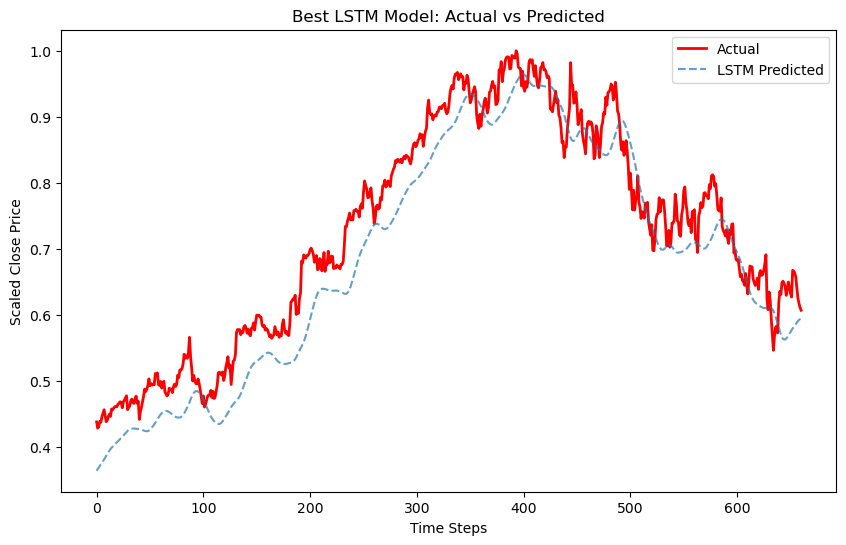

Best-performing BidirectionalLSTM model:


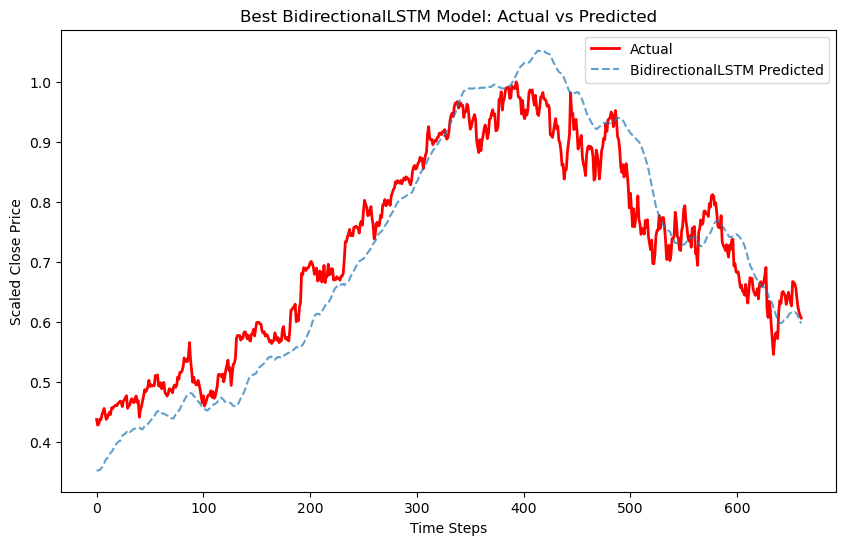

Best-performing VanillaRNN model:


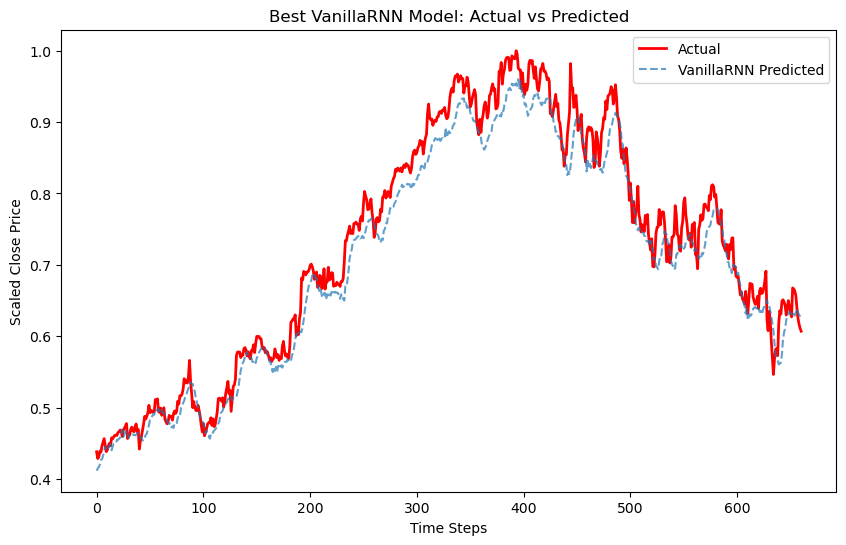

In [13]:
def plot_specific_architecture_best(results_df, histories, architecture, title):
    best_model_arch = results_df[results_df["Architecture"] == architecture].sort_values(by="MAE").iloc[0]
    best_key = f"{architecture}_batch_size={best_model_arch['batch_size']}_dropout_rate={best_model_arch['dropout_rate']}_epochs={best_model_arch['epochs']}_layers={best_model_arch['layers']}_learning_rate={best_model_arch['learning_rate']}_sequence_length={best_model_arch['sequence_length']}_units={best_model_arch['units']}"
    
    if best_key in histories:
        value = histories[best_key]
        plt.figure(figsize=(10, 6))
        plt.plot(value["y_test"].flatten(), label='Actual', color='red', linewidth=2)
        plt.plot(value["y_pred"].flatten(), label=f"{architecture} Predicted", linestyle='dashed', alpha=0.7)
        plt.title(f"{title}: Actual vs Predicted")
        plt.xlabel("Time Steps")
        plt.ylabel("Scaled Close Price")
        plt.legend()
        plt.show()
    else:
        print(f"KeyError: {best_key} not found in histories for {architecture}. Skipping...")

print("Best-performing LSTM model:")
plot_specific_architecture_best(results_df, histories, "LSTM", "Best LSTM Model")

print("Best-performing BidirectionalLSTM model:")
plot_specific_architecture_best(results_df, histories, "BidirectionalLSTM", "Best BidirectionalLSTM Model")

print("Best-performing VanillaRNN model:")
plot_specific_architecture_best(results_df, histories, "VanillaRNN", "Best VanillaRNN Model")
